#Importación de librerías

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#Datos iniciales

In [313]:
pos = {"q1": np.array([-0.5,0]),"q2":np.array([0.5,0])}

#Definición de funciones

In [143]:
E_field = lambda q , r: (9E9)*q/r**2

def E_total(q1, q1_r, q2, q2_r, point):
  
  #Campo debido a carga positiva
  r1 = point - q1_r
  r1_m = np.sqrt(r1[0]**2 + r1[1]**2)
  u1 = r1 / r1_m
  E_1 = E_field(q1, r1_m)*u1

  #Campo debido a carga negativa
  r2 = point - q2_r
  r2_m = np.sqrt(r2[0]**2 + r2[1]**2)
  u2 = r2 / r2_m
  E_2 = E_field(q2, r2_m)*u2

  #Campo total
  E = E_1 + E_2
  Ex = E[0]
  Ey = E[1]
  
  return Ex,Ey

In [370]:
def dipolo(q1, q2, xlim, ylim, n):

  #Creación del dominio para la función
  dom = [np.random.uniform(xlim, ylim, size=(2))*(-1) for i in range(n)]
  
  ran = np.array([E_total(q1, pos['q1'], q2, pos['q2'], i) for i in dom])
  plt.figure()

  #Graficación
  plt.quiver([dom[i][0] for i in range(len(dom))],
             [dom[i][1] for i in range(len(dom))],
             [ran[i][0] for i in range(len(dom))],
             [ran[i][1] for i in range(len(dom))])
  
  plt.xlim(-1,1)
  plt.plot(pos["q1"][0],pos["q1"][1],"go") 
  plt.plot(pos["q2"][0],pos["q2"][1],"ro") 

#Prueba de la función

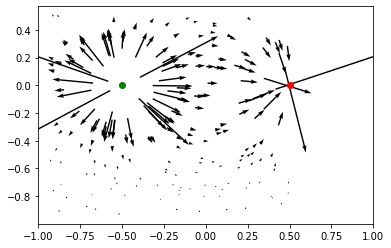

In [396]:
dipolo(.001,-.001,-0.5,0.93,200)

#Movimiento parabolico, pelota de bascket

In [406]:
def predict(velocidad_0,distancia,angulo_gra):
  respuesta = 'No la encestará'
  angulo_rad = angulo_gra * np.pi / 180
  t = 0
  h = 3.05
  x = 0
  y = 0
  while y>=0:
    velocidad_y = velocidad_0 * np.sin(angulo_rad)*t
    y = velocidad_0 * t + 0.5 - 9.8 * t**2
    t = t + 0.0005
    if h-1 <= y  <= h+1:
      x = velocidad_0 * np.cos(angulo_rad) * t
      if distancia-1 < x < distancia+1:
        respuesta = 'Si la encestará'
  return respuesta


In [407]:
predict(20/np.sqrt(3),10,30)

'Si la encestará'